#  Sentiment analysis on Hotel customer reviews.
```
Author: Mayank Walia
Date: May 2024
```



In this Machine Learning project, our aim is to conduct sentiment analysis on hotel reviews provided by customers. Sentiment analysis involves examining the attitudes and emotions expressed in the reviews to determine whether customers are happy or not happy with their experiences. It's a crucial technique in data science used to analyze textual data and derive actionable insights to enhance business strategies.

By applying sentiment analysis to hotel reviews, we'll delve into the customers' opinions, identifying whether they are happy or not happy with their experiences. This analysis enables us to understand customers' perceptions better, pinpoint areas of improvement, and make informed decisions to enhance the overall business performance.

In [1]:
import re
import nltk
import string
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(38932, 5)

In [4]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [5]:
df.columns

Index(['User_ID', 'Description', 'Browser_Used', 'Device_Used', 'Is_Response'], dtype='object')

In [6]:
# Drop duplicates
df=df.drop_duplicates(keep='first')

In [7]:
# Old Shape (38932, 5)
df.shape

(38932, 5)

In [8]:
# Removing redunctant columns
df=df.drop(columns=['User_ID','Browser_Used','Device_Used'])

In [9]:
encoder = LabelEncoder()
df['Is_Response'] = encoder.fit_transform(df['Is_Response'])

In [10]:
import re
def format_data(text):
    text=text.lower()
    return re.sub('\W+',' ', text)


In [11]:
df['feedback']=df['Description'].apply(format_data)

In [12]:
df.head(2)

,Description,Is_Response,feedback
0,The room was kind of clean but had a VERY stro...,1,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,1,i stayed at the crown plaza april april the st...


In [13]:
# Extracting train and test features
X=df['feedback']
y=df['Is_Response']

In [14]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31145,)
(7787,)
(31145,)
(7787,)


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [16]:
vectorizer=TfidfVectorizer()
classifier = LogisticRegression(solver='lbfgs')
pipe = Pipeline([('vectorizer',vectorizer),('classifier',classifier)])
pipe

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [17]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [18]:
y_pred=pipe.predict(X_test)

<Axes: >

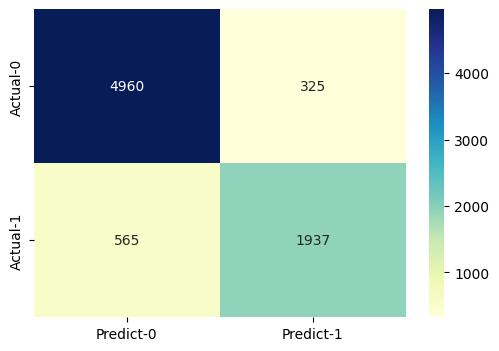

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
con_mat=pd.DataFrame(data=cm,columns=['Predict-0','Predict-1'],index=['Actual-0','Actual-1'])
plt.figure(figsize=(6,4))
sns.heatmap(con_mat,annot=True,fmt='d',cmap='YlGnBu')

In [20]:
accuracy_score(y_test,y_pred)

0.8857069474765635

In [21]:
test_data=pd.read_csv('test.csv')

In [22]:
test_data.head(2)

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop


In [23]:
def predict(test_data,model):
    test_data['feedback']=test_data['Description'].apply(format_data)
    y_pred_test=model.predict(test_data['feedback'])
    return y_pred_test

In [24]:
y_pred_test=predict(test_data,pipe)

In [25]:
test_data['feedback'][0]

'looking for a motel in close proximity to tv taping of a dr phil show we chose the dunes on sunset blvd in west hollywood although the property displayed the aaa emblem it certainly left a lot to be desired there were chips scrapes on the bottom of the door frame in the bathroom and the lotion containers were half full apparently not replaced by housekeeping we needed an early wakeup call but couldn t use the clock radio alarm as there wasn t a radio in the room there was no tv channel listing on the remote or on the tv menu making viewing a chore the tv remote had to be returned when checking out this place served its purpose but not a place to revisit '

In [26]:
'happy' if y_pred_test[0] == 0 else 'sad'

'sad'

In [27]:
y_pred_test[:10]

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [28]:
print(test_data['feedback'][1])
print('happy' if y_pred_test[1] == 0 else 'sad')

walking distance to madison square garden and the penn subway station also very close to lots of retail stores and restaurants the hotel offers free internet a gym and a hot breakfast our room was on the top floor facing th st the room was clean and the staff very helpful and accommodating the downside was that the a c was making a noise and the faucet in the bathroom was loose things that can be easily fixed we walked from the hotel to madison square gardens to times square and on to broadway everything considered i will definitely recommend this hotel to my friends 
happy
